In [12]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
os.getcwd()

'C:\\Users\\sebne\\OneDrive\\Documents\\FHWN_Tulln\\DataAnalysis\\repo\\src\\notebooks'

In [54]:
nir_results = pd.read_json("../../temp/nir_model_output.json")
mir_results = pd.read_json("../../temp/nir_model_output.json")

In [55]:
nir_results

,model,baseline_corr,RMSE,R2,training_time,prediction_time,best_params
0,SVR,als,2.758449,0.923046,10.546948,0.115512,"{'gamma': 10.0, 'C': 1000.0}"
1,Kernel Ridge,als,2.244364,0.949057,5.305923,0.022673,"{'gamma': 10.0, 'alpha': 0.001}"
2,XGBoost,als,1.863473,0.964881,702.074055,0.447873,"{'subsample': 0.8, 'n_estimators': 200, 'max_d..."
3,MLP,als,4.223529,0.819594,321.154994,0.010779,"{'learning_rate_init': 0.1, 'hidden_layer_size..."
4,SVR,detrend,0.780456,0.993840,7.819312,0.052914,"{'gamma': 1.0, 'C': 1000.0}"
5,Kernel Ridge,detrend,0.700188,0.995042,5.614898,0.018302,"{'gamma': 1.0, 'alpha': 0.001}"
6,XGBoost,detrend,1.240789,0.984430,694.845900,0.630136,"{'subsample': 0.8, 'n_estimators': 200, 'max_d..."
7,MLP,detrend,3.251751,0.893062,321.410037,0.008293,"{'learning_rate_init': 0.001, 'hidden_layer_si..."
8,SVR,fillpeaks,2.395561,0.941962,9.938183,0.115219,"{'gamma': 10.0, 'C': 1000.0}"
9,Kernel Ridge,fillpeaks,1.913007,0.962989,9.286311,0.019604,"{'gamma': 10.0, 'alpha': 0.001}"


In [56]:
pls_results1 = pd.read_json("../../temp/pls_fillpeaks_metrics.json")
pls_results2 = pd.read_json("../../temp/pls_detrend_metrics.json")
pls_results3 = pd.read_json("../../temp/pls_snv_metrics.json")
pls_results4 = pd.read_json("../../temp/pls_als_metrics.json")
pls_results5 = pd.read_json("../../temp/pls_msc_metrics.json")

pls_results = pd.concat([pls_results1,pls_results2,pls_results3,pls_results4,pls_results5])
pls_results = pd.json_normalize(pls_results['models'])

pls_results['model_name'] = pls_results['model_name'].str[0]
pls_results['baseline_corr'] = pls_results['baseline_corr'].str[0]
pls_results['RMSEP'] = pls_results['RMSEP'].str[0]
pls_results['R2'] = pls_results['R2'].str[0]
pls_results['training_time'] = pls_results['training_time'].str[0]

print(pls_results)

       model_name baseline_corr   RMSEP      R2  training_time
0             pls     fillpeaks  2.4530  0.9427          64.94
1  multiblock_pls     fillpeaks  2.5220  0.9202           7.54
2             pls       detrend  2.4040  0.9440          70.24
3  multiblock_pls       detrend  4.6976  0.7191           6.72
4             pls           snv  2.4134  0.9446          56.19
5  multiblock_pls           snv  4.4420  0.7486           5.69
6             pls           als  2.5473  0.9382          61.43
7  multiblock_pls           als  2.6322  0.9120           4.44
8             pls           msc  2.3709  0.9428          63.48
9  multiblock_pls           msc  2.3124  0.9343           6.07


In [57]:
results_heatmap = nir_results[["model","baseline_corr","R2"]]
pls_renamed = pls_results.rename(columns={"model_name": "model", "RMSEP": "RMSE"})
results_heatmap_pls = pls_renamed[["model","baseline_corr","R2"]]

results_heatmap = pd.concat([results_heatmap,results_heatmap_pls])
pivot = results_heatmap.pivot_table(index = 'model', columns = 'baseline_corr', values = 'R2')

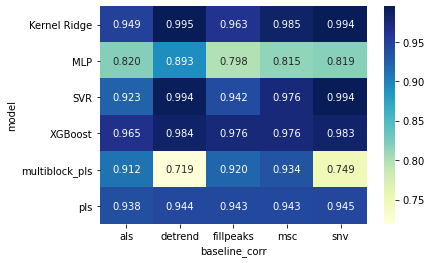

In [58]:
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt=".3f")
plt.show()

In [59]:
results_heatmap = nir_results[["model","baseline_corr","RMSE"]]
results_heatmap_pls = pls_renamed[["model","baseline_corr","RMSE"]]

results_heatmap = pd.concat([results_heatmap,results_heatmap_pls])
pivot = results_heatmap.pivot_table(index = 'model', columns = 'baseline_corr', values = 'RMSE')

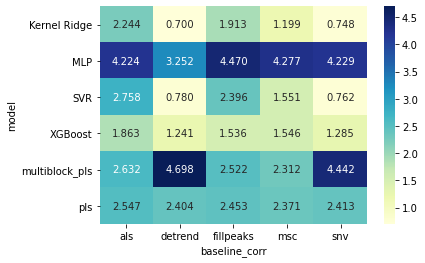

In [60]:
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt=".3f")
plt.show()

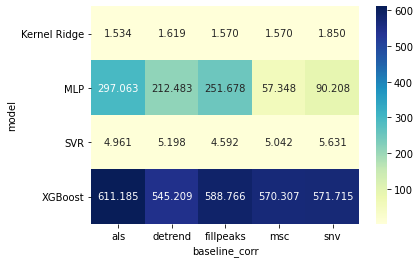

In [37]:
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt=".3f")
plt.show()

In [46]:
mir_results_heatmap = mir_results[["model","baseline_corr","r2"]]
pivot_rsquared = mir_results_heatmap.pivot_table(index = 'model', columns = 'baseline_corr', values = 'r2')
mir_results_heatmap_time = mir_results[["model","baseline_corr","training_time"]]
pivot_time = mir_results_heatmap_time.pivot_table(index = 'model', columns = 'baseline_corr', values = 'training_time')

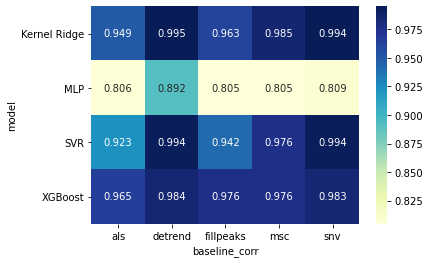

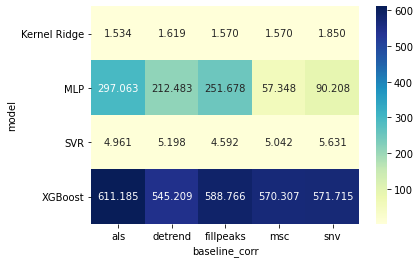

In [59]:
sns.heatmap(pivot_rsquared, cmap="YlGnBu", annot=True, fmt=".3f")
plt.show()
sns.heatmap(pivot_time, cmap="YlGnBu", annot=True, fmt=".3f")
plt.show()